Encoded String:00000001 Decoded String:  1 Time:00:00:01
Encoded String:00011101 Decoded String: 29 Time:00:00:29

Operator:Sprite Rail
Encoded String: 11
Line:A to E
Encoded String: 00000001
Rolling Stock:Train 15
Encoded String: 000011

Encoded String:00000101 Decoded String:  5 Time:00:00:05
Encoded String:00001010 Decoded String: 10 Time:00:00:10
Encoded String:00000001 Decoded String:  1 Time:00:00:01
Encoded String:00010011 Decoded String: 19 Time:00:00:19

Operator:Sprite Rail
Encoded String: 11
Line:A to F
Encoded String: 00000010
Rolling Stock:Train 15
Encoded String: 000011

Encoded String:00000111 Decoded String:  7 Time:00:00:07
Encoded String:00001110 Decoded String: 14 Time:00:00:14
Encoded String:00000001 Decoded String:  1 Time:00:00:01
Encoded String:00010011 Decoded String: 19 Time:00:00:19

Operator:Sprite Rail
Encoded String: 11
Line:B to E
Encoded String: 00000011
Rolling Stock:Train 15
Encoded String: 000011

Encoded String:00000111 Decoded String:  7 Time:00:00:0

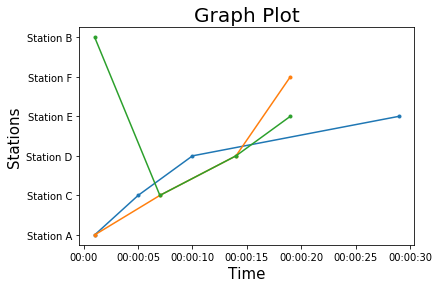

In [47]:
# NRDF Project - Toy Example
# Kieran Molloy

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sample=generateInitialPopulation(10,5)

#runTestProgram()


In [41]:
def generateInitialPopulation(popSize,numberOfStations):
    # Generate Initial Population
    
    stationBits=np.random.randint(2, size=(popSize, numberOfStations*8))
    

Encoded String:00000001 Decoded String:  1 Time:00:00:01
Encoded String:00011101 Decoded String: 29 Time:00:00:29

Operator:Sprite Rail
Encoded String: 11
Line:A to E
Encoded String: 00000001
Rolling Stock:Train 15
Encoded String: 000011

Encoded String:00000101 Decoded String:  5 Time:00:00:05
Encoded String:00001010 Decoded String: 10 Time:00:00:10
Encoded String:00000001 Decoded String:  1 Time:00:00:01
Encoded String:00010011 Decoded String: 19 Time:00:00:19

Operator:Sprite Rail
Encoded String: 11
Line:A to F
Encoded String: 00000010
Rolling Stock:Train 15
Encoded String: 000011

Encoded String:00000111 Decoded String:  7 Time:00:00:07
Encoded String:00001110 Decoded String: 14 Time:00:00:14
Encoded String:00000001 Decoded String:  1 Time:00:00:01
Encoded String:00010011 Decoded String: 19 Time:00:00:19

Operator:Sprite Rail
Encoded String: 11
Line:B to E
Encoded String: 00000011
Rolling Stock:Train 15
Encoded String: 000011

Encoded String:00000111 Decoded String:  7 Time:00:00:0

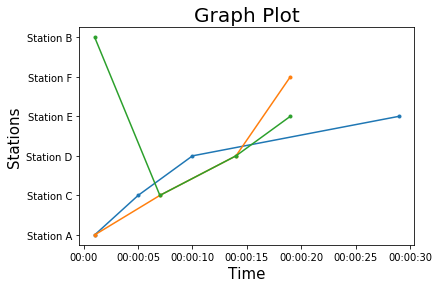

In [10]:
def decodeGA(encodedSolution):
    # Decode GA Problem as defined here###
    
    # Example
    # 00|00000000|000000|OOOOOOOO|11111111|22222222|33333333|DDDDDDDD
    # TOC|Line|RollingStock|Origin|Stop1|Stop2|Stop3|Destination
    
    # Deconstruct Solution String into Elements
    bitOperator=encodedSolution[0:2]
    bitLine=encodedSolution[2:10]
    bitRollingStock=encodedSolution[10:16]
    bitOrigin=encodedSolution[16:24]
    bitStations=encodedSolution[24:-8]
    bitDestination=encodedSolution[-8:]
    
    # Intermediate Stations Decoder
    numOfStops=len(bitStations)/8
    
    ###### Decode Elements #####
    # Decode Operator
    toc=decodeOperator(bitOperator);
    
    # Decode Line
    line=decodeLine(bitLine);
    
    # Decode Rolling Stock
    unit=decodeRollingStock(bitRollingStock,toc);
    
    # Decode Origin Station
    origin=decodeStation(bitOrigin);
    
    # Decode Destination
    destination=decodeStation(bitDestination);
    
    ###### Test Functions ######
    sPrinter = "\nOperator:{1}\nEncoded String: {0}"
    print(sPrinter.format(bitOperator,toc))
    sPrinter = "Line:{1}\nEncoded String: {0}"
    print(sPrinter.format(bitLine,line))
    sPrinter = "Rolling Stock:{1}\nEncoded String: {0}\n"
    print(sPrinter.format(bitRollingStock,unit))
    
    ##### Printing #####
    # Define Empty Stops Array
    stopTimes=[]
    # Add Origin Station
    stopTimes.append(origin)
    
    # Add intermediate stations
    for i in range(int(numOfStops)):
        stopTimes.append(decodeStation(bitStations[i:i+8]))
    
    # Add Final Station
    stopTimes.append(destination)
    
   
    # Reads from JSON file (implement later)
    if line=='A to E':
        stations=['Station A','Station C','Station D','Station E']
    elif line=='B to E':
        stations=['Station B','Station C','Station D','Station E']
    else:
        stations=['Station A','Station C','Station D','Station F']

    # Construct Output Dictionary
    calling_points={
        stations[0]:stopTimes[0]
    }
    for i in range(len(stations)):
        calling_points[stations[i]]=stopTimes[i]
        
    schedule={
        'operator':toc,
        'line':line,
        'rolling_stock':unit,
        'calling_points':calling_points
    }
    
    return schedule


In [11]:
def decodeOperator(encodedOperator):
    # Decode Operator as defined here###
    
    tocs={
            '00':'Pepsi Rail',
            '01':'Coke Rail',
            '10':'Fanta Rail',
            '11':'Sprite Rail',
        }
    return tocs.get(encodedOperator,"Invalid Operator")

In [12]:
def decodeLine(encodedLine):
    # Decode Operator as defined here###
    
    lines={
        '00000000':'Test Route',
        '00000001':'A to E',
        '00000010':'A to F',
        '00000011':'B to E',
        '00000100':'B to F',
        '00000101':'F to A',
        '00000110':'F to B',
        '00000111':'E to A',
        '00001000':'E to B',
        }
    
    return lines.get(encodedLine,"Invalid Line")

In [18]:
def decodeRollingStock(encodedRollingStock,operator):
    # Decode Operator as defined here###
    
    if operator=='Pepsi Rail':
        # if Northern was the TOC previously decoded
        rollingStock={
            '000000':'Test Stock',
            '000001':'Train 1',
            '000010':'Train 2',
            '000011':'Train 3',
            '000100':'Train 4',
            }
    elif operator=='Coke Rail':
        # if transpennine express
        rollingStock={
            '000000':'Test Stock',
            '000001':'Train 5',
            '000010':'Train 6',
            '000011':'Train 7',
            '000100':'Train 8',
        }
    elif operator=='Fanta Rail':
        # if transport for wales
        rollingStock={
            '000000':'Test Stock',
            '000001':'Train 9',
            '000010':'Train 10',
            '000011':'Train 11',
            '000100':'Train 12',
        }
    elif operator=='Sprite Rail':
        # if east midlands regional
        rollingStock={
            '000000':'Test Stock',
            '000001':'Train 13',
            '000010':'Train 14',
            '000011':'Train 15',
            '000100':'Train 16',
        }    
    return rollingStock.get(encodedRollingStock,"Invalid Rolling Stock & Operator Combination")

In [29]:
def decodeStation(encodedStation):
    # Decode Station as defined here###
    import datetime
    
    # Convert 8-bit binary to integer representation
    callingTimeInteger = int(encodedStation,2);
    
    # Get Day/Hour/Min/Sec
    day = callingTimeInteger//86400; 
    hour = (callingTimeInteger-(day*86400))//3600; 
    min = (callingTimeInteger - ((day*86400) + (hour*3600)))//60;
    seconds = callingTimeInteger - ((day*86400) + (hour*3600) + (min*60)); 
    # Create datetime object
    callingTime= datetime.time(hour, min, seconds);
    
    # Test Functions
    sPrinter = "Encoded String:{0} Decoded String: {1:2d} Time:{2}"
    print(sPrinter.format(encodedStation,callingTimeInteger,callingTime))
    return callingTime

In [23]:
def drawSchedule(allStations,timetable):
    
    # Define Figure Things
    fig, (ax1) = plt.subplots(1, 1)
    plt.title('Graph Plot', fontsize=20)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Stations', fontsize=15)
    
    # Extract Schedules
    single=timetable['schedules']
    
    # Loop through all schedules
    for schedule in single:
        # Extract Schedule Information
        operator=schedule['operator']
        rs=schedule['rolling_stock']
        l=schedule['line']
        cp=schedule['calling_points']

        # Extract Calling Points and insert into [station, time] dictionary
        data={"station":[],"time":[]}
        for station,time in cp.items():
            data["station"].append(station)
            data["time"].append(time)

        # Plot data
        
        my_plotter(ax1, data["time"], data["station"], {'marker': '.'})


In [16]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out



In [45]:
def runTestProgram():
    timetable={"schedules":[]}
    # Unit Test 1
    if ut1:
        # Sprite Rail | Station A to Station E | Train 15 | 00:00:00 | 00:00:05 | 00:00:10 | 00:00:29
        toc='11'
        line='00000001'
        unit='000011'
        origin='00000001'
        stop1='00000101'
        stop2='00011101'
        destination='00011101'
        testString=toc+line+unit+origin+stop1+stop2+destination
        timetable["schedules"].append(decodeGA(testString))

        # Sprite Rail | Station A to Station E | Train 15 | 00:00:00 | 00:00:00 | 00:00:00 | 00:00:00
        toc='11'
        line='00000010'
        unit='000011'
        origin='00000001'
        stop1='00000111'
        stop2='00010101'
        destination='00010011'
        testString=toc+line+unit+origin+stop1+stop2+destination
        timetable["schedules"].append(decodeGA(testString))

        # Sprite Rail | Station B to Station E | Train 15 | 00:00:00 | 00:00:00 | 00:00:00 | 00:00:00
        toc='11'
        line='00000011'
        unit='000011'
        origin='00000001'
        stop1='00000111'
        stop2='00010101'
        destination='00010011'
        testString=toc+line+unit+origin+stop1+stop2+destination
        timetable["schedules"].append(decodeGA(testString))


    # Plot Function Stuff
    drawSchedule(['Station A','Station B','Station C','Station D','Station E','Station F'],timetable)